In [ ]:
! pip install fastdtw
! pip install dtaidistance
! pip install dtaidistance matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp310-cp310-linux_x86_64.whl size=512546 sha256=6d8a3f2fb3707724b2e3384c897de4306fecce5ae2a04236095a6f7bf439f299
  Stored in directory: /root/.cache/pip/wheels/73/c8/f7/c25448dab74c3acf4848bc25d513c736bb93910277e1528ef4
Successfully built fastdtw
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 26.2 MB/s eta 0:00:00


In [ ]:
from datetime import datetime
import numpy as np
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean, cityblock, chebyshev, minkowski, cosine, correlation

In [ ]:
# Define a dictionary to hold appliance names as keys and corresponding data groups as values
appliance_tuple = (
    (["dishwasher"], [
        ('07/01/2024 11:41:10', '01607378'),
          ('07/01/2024 11:41:21', '01607380'),
          ('07/01/2024 11:41:31', '01607382'),
          ('07/01/2024 11:41:42', '01607384'),
          ('07/01/2024 11:41:52', '01607386'),
          ('07/01/2024 11:42:03', '01607388'),
          ('07/01/2024 11:47:27', '01607390'),
          ('07/01/2024 11:47:37', '01607392'),
          ('07/01/2024 11:47:48', '01607394'),
          ('07/01/2024 11:47:58', '01607396'),
          ('07/01/2024 11:48:09', '01607398'),
          ('07/01/2024 12:40:56', '01607399'),
          ('07/01/2024 12:41:06', '01607401'),
          ('07/01/2024 12:41:16', '01607403'),
          ('07/01/2024 12:41:27', '01607405'),
          ('07/01/2024 12:41:37', '01607407'),
          ('07/01/2024 12:41:48', '01607408'),
          ('07/01/2024 12:49:59', '01607410'),
          ('07/01/2024 12:50:09', '01607412'),
          ('07/01/2024 12:50:20', '01607414'),
          ('07/01/2024 12:50:30', '01607416'),
          ('07/01/2024 12:50:41', '01607418')
    ]),

    (["toilet_tm"], [
        ('07/11/2024 08:27:01', '01669082'),
        ('07/11/2024 08:27:11', '01669089'),
        ('07/11/2024 08:27:22', '01669093')
    ]),

    (["toilet_km"], [
        ('05/05/2024 12:05:21', '01410839'),
        ('05/05/2024 12:05:31', '01410845'),
        ('05/05/2024 12:05:42', '01410848')
    ]),

    (["sink_tm"], [
        ('05/05/2024 11:56:58', '01410834'),
        ('05/05/2024 11:57:08', '01410835'),
        ('05/05/2024 11:57:18', '01410836'),
    ]),

    (["shower_tm"], [
        ('07/01/2024 10:40:33', '01607266'),
        ('07/01/2024 10:40:54', '01607267'),
        ('07/01/2024 10:41:04', '01607268'),
        ('07/01/2024 10:41:15', '01607269'),
        ('07/01/2024 10:41:25', '01607270'),
        ('07/01/2024 10:41:36', '01607271'),
        ('07/01/2024 10:41:56', '01607272'),
        ('07/01/2024 10:42:07', '01607273'),
        ('07/01/2024 10:42:17', '01607274'),
        ('07/01/2024 10:42:28', '01607275'),
        ('07/01/2024 10:42:38', '01607276'),
        ('07/01/2024 10:42:59', '01607277'),
        ('07/01/2024 10:43:10', '01607278'),
        ('07/01/2024 10:43:20', '01607279'),
        ('07/01/2024 10:43:31', '01607280'),
        ('07/01/2024 10:43:51', '01607281'),
        ('07/01/2024 10:44:02', '01607282'),
        ('07/01/2024 10:44:12', '01607283'),
        ('07/01/2024 10:44:23', '01607284'),
        ('07/01/2024 10:44:33', '01607285'),
        ('07/01/2024 10:44:54', '01607286')
    ]),


    (["shower_km"], [
          ('05/05/2024 12:50:23', '01411084'),
          ('05/05/2024 12:50:33', '01411086'),
          ('05/05/2024 12:50:44', '01411088'),
          ('05/05/2024 12:50:54', '01411090'),
          ('05/05/2024 12:51:05', '01411093'),
          ('05/05/2024 12:51:15', '01411095'),
          ('05/05/2024 12:51:25', '01411097'),
          ('05/05/2024 12:51:36', '01411099'),
          ('05/05/2024 12:51:47', '01411101'),
          ('05/05/2024 12:51:57', '01411103'),
          ('05/05/2024 12:52:08', '01411105'),
          ('05/05/2024 12:52:18', '01411107'),
          ('05/05/2024 12:52:29', '01411109'),
          ('05/05/2024 12:52:39', '01411111'),
          ('05/05/2024 12:52:49', '01411113'),
          ('05/05/2024 12:53:00', '01411115'),
          ('05/05/2024 12:53:10', '01411117'),
          ('05/05/2024 12:53:21', '01411119'),
          ('05/05/2024 12:53:31', '01411121'),
          ('05/05/2024 12:53:42', '01411122'),
          ('05/05/2024 12:53:52', '01411124'),
          ('05/05/2024 12:54:03', '01411126'),
          ('05/05/2024 12:54:13', '01411128'),
          ('05/05/2024 12:54:24', '01411130'),
          ('05/05/2024 12:54:34', '01411132'),
          ('05/05/2024 12:54:45', '01411134'),
          ('05/05/2024 12:54:55', '01411136'),
          ('05/05/2024 12:55:06', '01411137'),
          ('05/05/2024 12:55:16', '01411139'),
          ('05/05/2024 12:55:27', '01411141'),
          ('05/05/2024 12:55:37', '01411143'),
          ('05/05/2024 12:55:47', '01411145'),
          ('05/05/2024 12:55:58', '01411147'),
          ('05/05/2024 12:56:08', '01411148'),
          ('05/05/2024 12:56:19', '01411150'),
          ('05/05/2024 12:56:29', '01411152'),
          ('05/05/2024 12:56:40', '01411154'),
          ('05/05/2024 12:56:50', '01411156'),
          ('05/05/2024 12:57:01', '01411157'),
          ('05/05/2024 12:57:11', '01411159'),
          ('05/05/2024 12:57:22', '01411161'),
          ('05/05/2024 12:57:32', '01411163'),
          ('05/05/2024 12:57:43', '01411165'),
          ('05/05/2024 12:57:53', '01411166'),
          ('05/05/2024 12:58:04', '01411168'),
          ('05/05/2024 12:58:14', '01411170'),
          ('05/05/2024 12:58:25', '01411172'),
          ('05/05/2024 12:58:35', '01411174'),
          ('05/05/2024 12:58:46', '01411175'),
          ('05/05/2024 12:58:56', '01411177'),
          ('05/05/2024 12:59:06', '01411179'),
          ('05/05/2024 12:59:17', '01411181'),
          ('05/05/2024 12:59:27', '01411182'),
          ('05/05/2024 12:59:38', '01411184'),
          ('05/05/2024 12:59:49', '01411186'),
          ('05/05/2024 12:59:59', '01411188'),
          ('05/05/2024 13:00:10', '01411190'),
          ('05/05/2024 13:00:20', '01411191'),
          ('05/05/2024 13:00:31', '01411193'),
          ('05/05/2024 13:00:41', '01411195'),
          ('05/05/2024 13:00:52', '01411197'),
          ('05/05/2024 13:01:02', '01411198'),
          ('05/05/2024 13:01:12', '01411200'),
          ('05/05/2024 13:01:23', '01411202'),
          ('05/05/2024 13:01:33', '01411204'),
          ('05/05/2024 13:01:44', '01411205'),
          ('05/05/2024 13:01:55', '01411207'),
          ('05/05/2024 13:02:05', '01411208')

      ]),

    (["hose"], [
        ('05/05/2024 12:13:54', '01410870'),
        ('05/05/2024 12:14:05', '01410878'),
        ('05/05/2024 12:14:15', '01410887'),
        ('05/05/2024 12:14:25', '01410895'),
        ('05/05/2024 12:14:36', '01410903'),
        ('05/05/2024 12:14:46', '01410911'),
        ('05/05/2024 12:14:57', '01410920'),
        ('05/05/2024 12:15:07', '01410928'),
        ('05/05/2024 12:15:18', '01410936'),
        ('05/05/2024 12:15:28', '01410945'),
        ('05/05/2024 12:15:39', '01410953'),
        ('05/05/2024 12:15:49', '01410961'),
        ('05/05/2024 12:16:00', '01410970'),
        ('05/05/2024 12:16:10', '01410978'),
        ('05/05/2024 12:16:21', '01410986'),
        ('05/05/2024 12:16:31', '01410994'),
        ('05/05/2024 12:16:42', '01411003'),
        ('05/05/2024 12:16:52', '01411011')
    ]),

    (["laundry"], [
        ('05/05/2024 22:47:22', '01412061'),
        ('05/05/2024 22:47:33', '01412066'),
        ('05/05/2024 22:51:13', '01412067'),
        ('05/05/2024 22:51:23', '01412068'),
        ('05/05/2024 22:51:34', '01412069'),
        ('05/05/2024 22:51:44', '01412070'),
        ('05/05/2024 22:51:55', '01412071'),
        ('05/05/2024 22:52:05', '01412072'),
        ('05/05/2024 22:52:16', '01412073'),
        ('05/05/2024 22:52:37', '01412074'),
        ('05/05/2024 22:52:47', '01412075'),
        ('05/05/2024 22:52:58', '01412076'),
        ('05/05/2024 22:53:08', '01412077'),
        ('05/05/2024 22:53:29', '01412081'),
        ('05/05/2024 22:53:40', '01412086'),
        ('05/05/2024 22:53:50', '01412087'),
        ('05/05/2024 22:58:54', '01412091'),
        ('05/05/2024 22:59:04', '01412094'),
        ('05/05/2024 22:59:15', '01412099'),
        ('05/05/2024 22:59:25', '01412103'),
        ('05/05/2024 22:59:36', '01412108'),
        ('05/05/2024 22:59:46', '01412112'),
        ('05/05/2024 22:59:56', '01412116'),
        ('05/05/2024 23:00:07', '01412121'),
        ('05/05/2024 23:00:17', '01412125'),
        ('05/05/2024 23:00:28', '01412130'),
        ('05/05/2024 23:00:38', '01412135'),
        ('05/05/2024 23:00:49', '01412136'),
        ('05/05/2024 23:00:59', '01412138'),
        ('05/05/2024 23:01:10', '01412142'),
        ('05/05/2024 23:01:20', '01412143'),
        ('05/05/2024 23:01:31', '01412147'),
        ('05/05/2024 23:01:41', '01412148'),
        ('05/05/2024 23:04:18', '01412149'),
        ('05/05/2024 23:04:29', '01412152'),
        ('05/05/2024 23:04:39', '01412154'),
        ('05/05/2024 23:05:00', '01412156'),
        ('05/05/2024 23:05:21', '01412158'),
        ('05/05/2024 23:05:31', '01412159'),
        ('05/05/2024 23:05:42', '01412161'),
        ('05/05/2024 23:09:22', '01412163'),
        ('05/05/2024 23:09:32', '01412164'),
        ('05/05/2024 23:09:43', '01412166'),
        ('05/05/2024 23:09:53', '01412167'),
        ('05/05/2024 23:10:04', '01412169'),
        ('05/05/2024 23:10:14', '01412170'),
        ('05/05/2024 23:10:56', '01412172'),
        ('05/05/2024 23:15:39', '01412176'),
        ('05/05/2024 23:15:49', '01412181'),
        ('05/05/2024 23:16:00', '01412185'),
        ('05/05/2024 23:16:10', '01412188'),
        ('05/05/2024 23:16:20', '01412192'),
        ('05/05/2024 23:16:31', '01412197'),
        ('05/05/2024 23:16:41', '01412201'),
        ('05/05/2024 23:16:52', '01412206'),
        ('05/05/2024 23:17:02', '01412210'),
        ('05/05/2024 23:17:13', '01412212'),
        ('05/05/2024 23:19:08', '01412215'),
        ('05/05/2024 23:19:18', '01412216'),
        ('05/05/2024 23:20:21', '01412218'),
        ('05/05/2024 23:20:32', '01412222'),
        ('05/05/2024 23:20:42', '01412227'),
        ('05/05/2024 23:20:52', '01412231'),
        ('05/05/2024 23:21:03', '01412235'),
        ('05/05/2024 23:21:13', '01412236'),
        ('05/05/2024 23:21:24', '01412239'),
        ('05/05/2024 23:21:34', '01412243'),
        ('05/05/2024 23:21:45', '01412247'),
        ('05/05/2024 23:21:55', '01412252'),
        ('05/05/2024 23:24:01', '01412254'),
        ('05/05/2024 23:24:12', '01412257'),
        ('05/05/2024 23:24:22', '01412261'),
        ('05/05/2024 23:24:32', '01412265'),
        ('05/05/2024 23:24:43', '01412267'),
        ('05/06/2024 00:25:59', '01412267'),
        ('05/06/2024 01:26:11', '01412272'),
        ('05/06/2024 01:26:21', '01412274')
    ]),
)


def change_in_points(data):
        """
        Calculate changes in water meter readings and timestamps for each appliance in the tuple.

        :param appliance_tuple: tuple, containing multiple appliances and their usage data
        :return: tuple, containing multiple appliances and their modified usage data
        """

        # Extract timestamps and water meter readings
        timestamps = [entry[0] for entry in data]
        readings = [int(entry[1]) / 10.0 for entry in data]

        # Calculate change in water meter reading
        changes_readings = [readings[i + 1] - readings[i] for i in range(len(readings) - 1)]

        # Calculate change in timestamps
        changes_timestamps = [
            (datetime.strptime(timestamps[i + 1], '%m/%d/%Y %H:%M:%S') - datetime.strptime(timestamps[i],
                                                                                           '%m/%d/%Y %H:%M:%S')).total_seconds()
            for i in range(len(timestamps) - 1)
        ]

        # Round down changes in timestamps to the nearest 10 seconds
        rounded_changes_timestamps = [round(change / 10.0) * 10 for change in changes_timestamps]


        cr = [a / b for a, b in zip(changes_readings, rounded_changes_timestamps)]
        # Combine timestamps and changes
        combined_data = list(zip(rounded_changes_timestamps, changes_readings))

        false_indexes = []
        i = 0
        while i < len(combined_data):
            change_time, value = combined_data[i]
            if change_time > 10:
                # Insert the modified tuples into the original_tuples list
                combined_data.insert(i + 1, (change_time - 10, value))
                combined_data[i] = (10, 0)
                false_indexes.append(i)

            i += 1

        # Extract the second elements (ignoring the first '10' elements)
        values = [x[1] for x in combined_data]

        # Create a new index for the plot
        indices = list(range(1, len(values) + 1))

        return combined_data

water_signatures = {}

for item in appliance_tuple:
  data = item[-1]
  for i in range(1):
    appliance_data = data
    r = change_in_points(appliance_data)
    result = [value for _, value in r]

    value_to_add = result # np.array(result)

    if item[0][0] in water_signatures.keys():
      water_signatures[item[0][0]].append(value_to_add[0])
    else:
      water_signatures[item[0][0]] = value_to_add

In [ ]:
from datetime import datetime, timedelta

gallon_token = {'dishwasher':0,
                'toilet_tm':0,
                'toilet_km':0,
                'sink_tm':0,
                'shower_tm':0,
                'shower_km':0,
                'hose':0,
                'laundry':0}

# Define the path to the text file
file_path = 'water_meter_data.txt'

# Function to read and parse the file content
def read_file_content(file_path):
    with open(file_path, 'r') as file:
        # Read each line and strip unnecessary whitespace and newlines
        lines = [line.strip().strip("()").replace("'", "").split(", ") for line in file.readlines()]
        # Convert to list of tuples
        data = [(line[0], line[1]) for line in lines]
    return data

# Function to parse timestamp string into datetime object
def parse_timestamp(ts_str):
    return datetime.strptime(ts_str, '%m/%d/%Y %H:%M:%S')

# Function to filter data between 5 AM of the current day to 5 AM of the next day
def filter_data_for_day(data, start_time_str='05:00:00'):
    first_entry_date = parse_timestamp(data[0][0]).date()
    day_start = datetime.combine(first_entry_date, datetime.strptime(start_time_str, '%H:%M:%S').time())
    day_end = day_start + timedelta(days=1)

    # Filter data between the specified range
    filtered_data = []
    for entry in data:
        timestamp = parse_timestamp(entry[0])
        if timestamp >= day_start and timestamp < day_end:
            filtered_data.append(entry)

    return filtered_data



# Placeholder functions for func_a and func_b
def func_a(new_appliance):
    # Placeholder for function A
    r = change_in_points(new_appliance)
    new_array = [value for _, value in r]
    return new_array

def func_b(new_array):
    new_signature = new_array
    known_signatures = list(water_signatures.values())

    for appliance, length in fixed_lengths.items():

      if len(new_signature) < length:
        c = 1
      else:
        c = len(new_signature) - length + 1

      for i in range(c):

        if c == 1:
          sublist = new_signature[:]
        else:
          sublist = new_signature[i:i + length]

        print(new_signature)

        if sublist[0] == 0:
          continue
        else:
          # Compute DTW distances and paths for fixed and variable length signatures
          distances, paths = compute_dtw_distances_and_paths(sublist, known_signatures)

          # Find the most similar signature based on DTW distance
          most_similar = find_most_similar(distances)

          if list(gallon_token.keys())[most_similar['index']] == appliance:
            sublist, gallons_to_appliance = remove__signature(np.array(known_signatures[most_similar['index']]), np.array(sublist))
            sublist = np.round(sublist, 3)
            new_signature[i:i + length] = sublist

            gallon_token[list(water_signatures.keys())[most_similar['index']]] += gallons_to_appliance


            plt.plot(new_signature, marker='o')
            plt.title('Combination')
            plt.grid(True)
            plt.show()


    # OTHER

    new_signatures = split_list_by_zeros(new_signature)

    for new_signature in new_signatures:

      while np.sum(new_signature) != 0:

        # Compute DTW distances and paths for fixed and variable length signatures
        distances, paths = compute_dtw_distances_and_paths(new_signature, known_signatures)

        # Find the most similar signature based on DTW distance
        most_similar = find_most_similar(distances)

        new_signature, gallons_to_appliance = remove__signature(np.array(known_signatures[most_similar['index']]), np.array(new_signature))
        new_signature = np.round(new_signature, 3)

        # Find the indices where the array is non-zero
        non_zero_indices = np.nonzero(new_signature)[0]

        # Slice the array from the first non-zero index to the last non-zero index
        if non_zero_indices.size > 0:
          new_signature = new_signature[non_zero_indices[0]:non_zero_indices[-1] + 1]

        gallon_token[list(water_signatures.keys())[most_similar['index']]] += gallons_to_appliance

    return gallon_token

# Read and parse the file content
file_content = [
    ('07/09/2024 00:20:39', '01648368'),
    ('07/09/2024 00:20:50', '01648375'),
    ('07/09/2024 00:21:00', '01648378'),
    ('07/09/2024 00:21:53', '01648379'),
    ('07/09/2024 00:22:03', '01648381'),
    ('07/09/2024 00:22:13', '01648383'),
    ('07/09/2024 00:22:24', '01648385'),
    ('07/09/2024 00:22:34', '01648387')
]

fixed_lengths = {'dishwasher': 450, 'laundry': 719}
known_signatures = list(water_signatures.values())
fixed_lengths = dict(sorted(fixed_lengths.items(), key=lambda item: item[1], reverse=True))


# Filter the data based on the specified time range
filtered_data = filter_data_for_day(file_content)

# Run func_a and func_b on the filtered data
processed_data = func_a(filtered_data)

if processed_data != []:
  gallon_token = func_b(processed_data)

# Print the filtered data for inspection
print(gallon_token)


{'dishwasher': 0, 'toilet_tm': 0, 'toilet_km': 0, 'sink_tm': 0, 'shower_tm': 0, 'shower_km': 0, 'hose': 0, 'laundry': 0}


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis
import matplotlib.pyplot as plt
from scipy.signal import correlate


from fastdtw import fastdtw

gallon_token = {'dishwasher':0,
                'toilet_tm':0,
                'toilet_km':0,
                'sink_tm':0,
                'shower_tm':0,
                'shower_km':0,
                'hose':0,
                'laundry':0}


new_appliance = [
          ('05/05/2024 22:47:22', '01412061'),
        ('05/05/2024 22:47:33', '01412066'),
        ('05/05/2024 22:51:13', '01412067'),
        ('05/05/2024 22:51:23', '01412068'),
        ('05/05/2024 22:51:34', '01412069'),
        ('05/05/2024 22:51:44', '01412070'),
        ('05/05/2024 22:51:55', '01412071'),
        ('05/05/2024 22:52:05', '01412072'),
        ('05/05/2024 22:52:16', '01412073'),
        ('05/05/2024 22:52:37', '01412074'),
        ('05/05/2024 22:52:47', '01412075'),
        ('05/05/2024 22:52:58', '01412076'),
        ('05/05/2024 22:53:08', '01412077'),
        ('05/05/2024 22:53:29', '01412081'),
        ('05/05/2024 22:53:40', '01412086'),
        ('05/05/2024 22:53:50', '01412087'),
        ('05/05/2024 22:58:54', '01412091'),
        ('05/05/2024 22:59:04', '01412094'),
        ('05/05/2024 22:59:15', '01412099'),
        ('05/05/2024 22:59:25', '01412103'),
        ('05/05/2024 22:59:36', '01412108'),
        ('05/05/2024 22:59:46', '01412112'),
        ('05/05/2024 22:59:56', '01412116'),
        ('05/05/2024 23:00:07', '01412121'),
        ('05/05/2024 23:00:17', '01412125'),
        ('05/05/2024 23:00:28', '01412130'),
        ('05/05/2024 23:00:38', '01412135'),
        ('05/05/2024 23:00:49', '01412136'),
        ('05/05/2024 23:00:59', '01412138'),
        ('05/05/2024 23:01:10', '01412142'),
        ('05/05/2024 23:01:20', '01412143'),
        ('05/05/2024 23:01:31', '01412147'),
        ('05/05/2024 23:01:41', '01412148'),
        ('05/05/2024 23:04:18', '01412149'),
        ('05/05/2024 23:04:29', '01412152'),
        ('05/05/2024 23:04:39', '01412154'),
        ('05/05/2024 23:05:00', '01412156'),
        ('05/05/2024 23:05:21', '01412158'),
        ('05/05/2024 23:05:31', '01412159'),
        ('05/05/2024 23:05:42', '01412161'),
        ('05/05/2024 23:09:22', '01412163'),
        ('05/05/2024 23:09:32', '01412164'),
        ('05/05/2024 23:09:43', '01412166'),
        ('05/05/2024 23:09:53', '01412167'),
        ('05/05/2024 23:10:04', '01412169'),
        ('05/05/2024 23:10:14', '01412170'),
        ('05/05/2024 23:10:56', '01412172'),
        ('05/05/2024 23:15:39', '01412176'),
        ('05/05/2024 23:15:49', '01412181'),
        ('05/05/2024 23:16:00', '01412185'),
        ('05/05/2024 23:16:10', '01412188'),
        ('05/05/2024 23:16:20', '01412192'),
        ('05/05/2024 23:16:31', '01412197'),
        ('05/05/2024 23:16:41', '01412201'),
        ('05/05/2024 23:16:52', '01412206'),
        ('05/05/2024 23:17:02', '01412210'),
        ('05/05/2024 23:17:13', '01412212'),
        ('05/05/2024 23:19:08', '01412215'),
        ('05/05/2024 23:19:18', '01412216'),
        ('05/05/2024 23:20:21', '01412218'),
        ('05/05/2024 23:20:32', '01412222'),
        ('05/05/2024 23:20:42', '01412227'),
        ('05/05/2024 23:20:52', '01412231'),
        ('05/05/2024 23:21:03', '01412235'),
        ('05/05/2024 23:21:13', '01412236'),
        ('05/05/2024 23:21:24', '01412239'),
        ('05/05/2024 23:21:34', '01412243'),
        ('05/05/2024 23:21:45', '01412247'),
        ('05/05/2024 23:21:55', '01412252'),
        ('05/05/2024 23:24:01', '01412254'),
        ('05/05/2024 23:24:12', '01412257'),
        ('05/05/2024 23:24:22', '01412261'),
        ('05/05/2024 23:24:32', '01412265'),
        ('05/05/2024 23:24:43', '01412267'),
        ('05/06/2024 00:25:59', '01412267'),
        ('05/06/2024 01:26:11', '01412272'),
        ('05/06/2024 01:26:21', '01412274')
        ]

# for all variable and non gap fixed appliances
def split_list_by_zeros(input_list):
    result = []
    current_sublist = []

    i = 0
    while i < len(input_list):
        if i < len(input_list) - 1 and input_list[i] == 0 and input_list[i+1] == 0:
            # When two consecutive zeros are found, end the current sublist and start a new one
            if current_sublist:
                result.append(current_sublist)
                current_sublist = []
            i += 2  # Skip both zeros
        else:
            current_sublist.append(input_list[i])
            i += 1

    # Append the last sublist if not empty
    if current_sublist:
        result.append(current_sublist)

    return result

# for all fixed appliances

r = change_in_points(new_appliance)
new_array = [value for _, value in r]

fixed_lengths = {'dishwasher': 450, 'laundry': 719}
known_signatures = list(water_signatures.values())

print(len(new_array))


951


{'index': 0, 'dtw_distance': 0.8888194417289392}
{'index': 0, 'dtw_distance': 0.8602325266974961}
{'index': 0, 'dtw_distance': 0.6999999999916845}
{'index': 0, 'dtw_distance': 0.6480740698327024}
{'index': 0, 'dtw_distance': 0.6480740698327024}
{'index': 3, 'dtw_distance': 0.66332495807108}
{'index': 3, 'dtw_distance': 0.6164414002968978}
{'index': 3, 'dtw_distance': 0.574456264653803}
{'index': 3, 'dtw_distance': 0.5291502622129183}
{'index': 3, 'dtw_distance': 0.5000000000000001}
{'index': 3, 'dtw_distance': 0.479583152331272}
{'index': 3, 'dtw_distance': 0.45825756949558405}
{'index': 3, 'dtw_distance': 0.38729833462074176}
{'index': 3, 'dtw_distance': 0.3464101615137755}
{'index': 3, 'dtw_distance': 0.316227766016838}
{'index': 3, 'dtw_distance': 0.28284271247461906}
{'index': 3, 'dtw_distance': 0.24494897427831783}
{'index': 3, 'dtw_distance': 0.2}
{'index': 3, 'dtw_distance': 0.14142135623730953}
{'index': 3, 'dtw_distance': 8.231798499321697e-12}
{'dishwasher': 100.0, 'toilet_tm

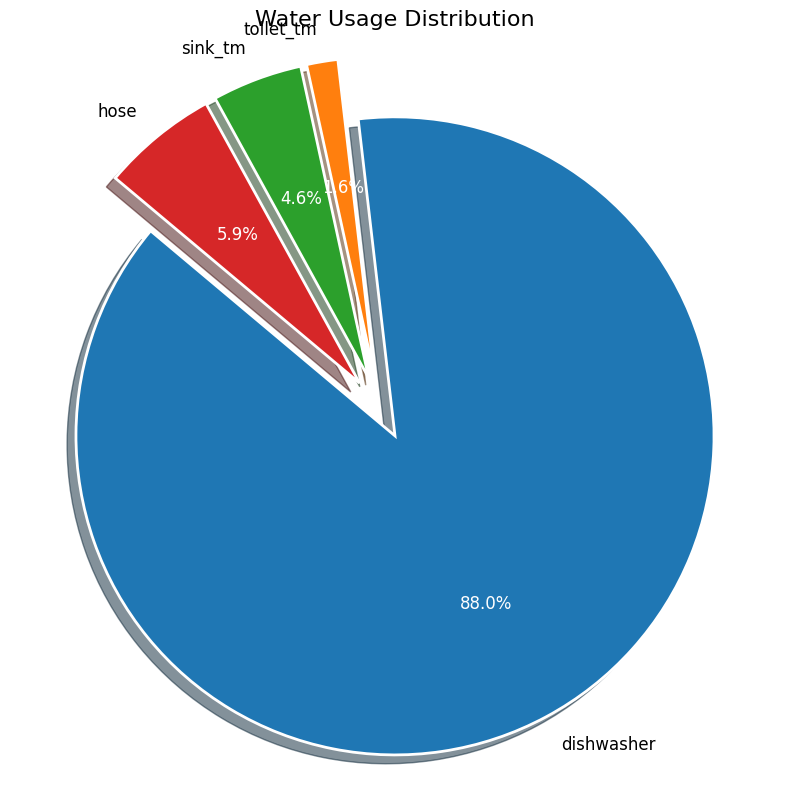

In [ ]:


#new_array = [0.20000000001164153, 0.1999999999825377, 0.20000000001164153, 0.29999999998835847, 0.20000000001164153, 0.20000000001164153, 0.1999999999825377, 0.20000000001164153, 0.1999999999825377, 0.20000000001164153, 0.39999999999417923, 0.29999999998835847, 0.3000000000174623, 0.1999999999825377, 0.3000000000174623, 0.29999999998835847, 0.29999999998835847, 0.3000000000174623, 0.20000000001164153, 0.1999999999825377, 0.3000000000174623, 0.29999999995925464, 0.3000000000174623, 0.3000000000174623, 0.29999999998835847, 0.20000000001164153, 0.20000000001164153, 0.29999999995925464, 0.20000000001164153, 0.1999999999825377, 0.20000000001164153, 0.20000000001164153, 0.09999999997671694, 0.20000000001164153, 0.20000000001164153, 0.1999999999825377, 0.20000000001164153, 0.10000000000582077, 0.1999999999825377, 0.20000000001164153, 0.1999999999825377, 0.20000000001164153, 0.10000000000582077, 0.1999999999825377, 0.20000000001164153, 0.20000000001164153, 0.1999999999825377, 0.10000000000582077, 0.20000000001164153, 0.1999999999825377, 0.20000000001164153, 0.10000000000582077, 0.1999999999825377, 0.20000000001164153, 0.1999999999825377, 0.20000000001164153, 0.10000000000582077, 0.1999999999825377, 0.20000000001164153, 0.20000000001164153, 0.09999999997671694, 0.20000000001164153, 0.20000000001164153, 0.1999999999825377, 0.10000000000582077, 0.20000000001164153, 0.09999999997671694]

known_signatures = list(water_signatures.values())
new_signature = new_array


def first_derivative(signature):
    return np.diff(signature, prepend=signature[0])

def pad_signature(signature, desired_length):
    repeat_factor = (desired_length // len(signature)) + 1
    padded_signature = np.tile(signature, repeat_factor)[:desired_length]
    return padded_signature

def remove__signature(remove_signature, combined_signature):
    if len(remove_signature) > len(combined_signature):
        # The combined signature is smaller than the correlation signature
        best_corr_value = float('-inf')
        best_match_index = 0
        best_matched_segment = np.zeros_like(combined_signature)

        # Slide a window over the remove_signature to match the length of the combined_signature
        for i in range(len(remove_signature) - len(combined_signature) + 1):
            window = remove_signature[i:i + len(combined_signature)]

            # Compute cross-correlation for the window
            corr = correlate(combined_signature, window, mode='valid')

            # Find the index of the maximum correlation within this window
            max_corr_value = np.max(corr)

            if max_corr_value > best_corr_value:
                best_corr_value = max_corr_value
                best_match_index = i
                best_matched_segment = window

        # Subtract the best matched segment from the combined signature
        result_signature = combined_signature.copy()
        result_signature -= best_matched_segment

        # Ensure that no values in the result signature are less than 0
        result_signature = np.maximum(result_signature, 0)

        # Calculate usage removed
        removed_usage = np.sum(best_matched_segment)

        return result_signature, removed_usage
    else:
      # Compute cross-correlation
      corr = correlate(combined_signature, remove_signature, mode='valid')

      # Find the index of the maximum correlation
      max_index = np.argmax(corr)

      # Extract the segment of the combined signature that matches the shower signature
      matched_segment = combined_signature[max_index:max_index + len(remove_signature)]

      # Subtract the shower signature from the combined signature
      result_signature = combined_signature.copy()
      result_signature[max_index:max_index + len(remove_signature)] -= remove_signature

      result_signature = np.maximum(result_signature, 0)

      # Calculate water usage removed
      removed_usage = np.sum(remove_signature)

      return result_signature, removed_usage

# Compute DTW distances and paths for fixed and variable length signatures
def compute_dtw_distances_and_paths(new_signature, known_signatures):
    results = []
    paths = []

    if len(new_signature) >= 3:
      new_signature = first_derivative(new_signature)

    for idx, known_signature in enumerate(known_signatures):

        if len(new_signature) >= 3:
          known_signature = first_derivative(known_signature)

        if len(new_signature) > len(known_signature):
            known_signature_extend = pad_signature(known_signature, len(new_signature))
            min_distance, best_path = dtw.warping_paths(new_signature, known_signature_extend)
            # plot_signatures(new_signature, known_signature_extend, idx)

        elif len(new_signature) < len(known_signature):
            new_signature_extend = pad_signature(new_signature, len(known_signature))
            min_distance, best_path = dtw.warping_paths(new_signature_extend, known_signature)
            # plot_signatures(new_signature_extend, known_signature, idx)

        else:
            min_distance, best_path = dtw.warping_paths(new_signature, known_signature)
            #plot_signatures(new_signature, known_signature, idx)

        results.append({
              'index': idx,
              'dtw_distance': min_distance,
        })

        paths.append(best_path)
    return results, paths

# Find the most similar signature
def find_most_similar(results):
    return min(results, key=lambda x: x['dtw_distance'])


# next step

while np.sum(new_signature) != 0:

  # Compute DTW distances and paths for fixed and variable length signatures
  distances, paths = compute_dtw_distances_and_paths(new_signature, known_signatures)

  # Find the most similar signature based on DTW distance
  most_similar = find_most_similar(distances)

  print(most_similar)

  new_signature, gallons_to_appliance = remove__signature(np.array(known_signatures[most_similar['index']]), np.array(new_signature))
  new_signature = np.round(new_signature, 3)

  # Find the indices where the array is non-zero
  non_zero_indices = np.nonzero(new_signature)[0]

  # Slice the array from the first non-zero index to the last non-zero index
  if non_zero_indices.size > 0:
    new_signature = new_signature[non_zero_indices[0]:non_zero_indices[-1] + 1]

  gallon_token[list(water_signatures.keys())[most_similar['index']]] += gallons_to_appliance

 # plt.plot(new_signature, marker='o')
 # plt.title('Combination')
 # plt.grid(True)
 # plt.show()"""

print(gallon_token)

# Filter out zero values for the pie chart
labels = [key for key, value in gallon_token.items() if value > 0]
sizes = [value for value in gallon_token.values() if value > 0]

# Create a new figure
plt.figure(figsize=(8, 8))

# Define colors for the pie chart
colors = plt.cm.tab10.colors  # Use a colormap for better aesthetics

# Create pie chart with aesthetic options
if sizes:  # Ensure there are non-zero values to plot
    wedges, texts, autotexts = plt.pie(
        sizes,
        labels=labels,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors[:len(sizes)],  # Limit colors to the number of sizes
        shadow=True,
        explode=[0.1] * len(sizes)  # Slightly explode each slice
    )

    # Aesthetic adjustments
    for text in texts:
        text.set_fontsize(12)  # Label font size
    for autotext in autotexts:
        autotext.set_fontsize(12)  # Percentage font size
        autotext.set_color('white')  # Color of percentage text

    plt.setp(wedges, linewidth=2, edgecolor='white')  # Edge color and width

else:
    plt.pie([1], labels=['No Data'], startangle=140)  # Fallback for empty data

# Equal aspect ratio ensures that pie chart is drawn as a circle
plt.axis('equal')
plt.title('Water Usage Distribution', fontsize=16)  # Title of the pie chart
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


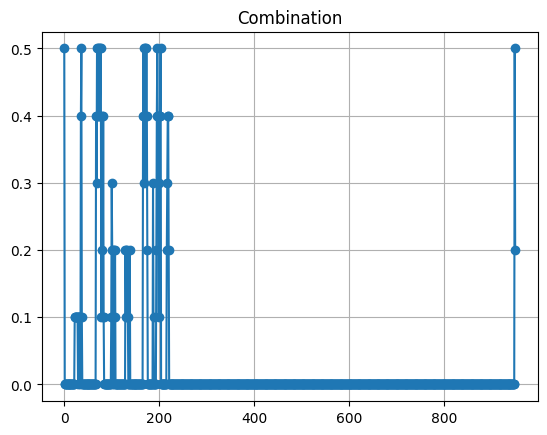

[0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.10000000000582077, 0.09999999997671694, 0.10000000000582077, 0.10000000000582077, 0.10000000000582077, 0.10000000000582077, 0.09999999997671694, 0, 0.10000000000582077, 0.10000000000582077, 0.10000000000582077, 0.10000000000582077, 0, 0.39999999999417923, 0.5, 0.10000000000582077, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.39999999999417923, 0.29999999998835847, 0.5, 0.39999999999417923, 0.5, 0.40000000002328306, 0.39999999999417923, 0.5, 0.39999999999417923, 0.5, 0.5, 0.10000000000582077, 0.1999999999825377, 0.40000000002328306, 0.09999999997671694, 0.40000000002328306, 0.09999999997671694, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.10000000000582077, 0.3000000000174623, 0.1999999999825377, 0, 0.20000000001164153, 0, 0.1999999999825377, 0.10000000000582077, 0.20000000001164153, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1999999999825377, 0.1000

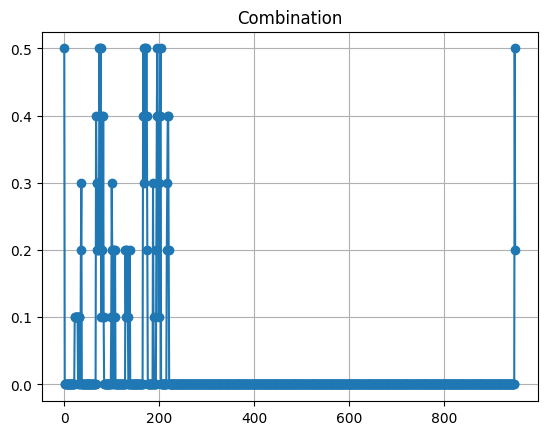

HEREEEE
HERRR2
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.0, 0.1, 0.1, 0.1, 0.0, 0.0, 0.2, 0.3, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.3, 0.3, 0.2, 0.3, 0.2, 0.2, 0.5, 0.4, 0.5, 0.5, 0.1, 0.2, 0.4, 0.1, 0.4, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.3, 0.2, 0.0, 0.2, 0.0, 0.2, 0.1, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.1, 0.2, 0.1, 0.2, 0.1, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.5, 0.4, 0.3, 0.4, 0.5, 0.4, 0.5, 0.4, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.4, 0.5, 0.4,

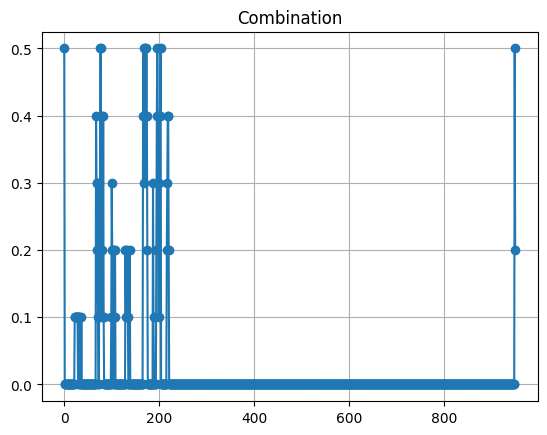

HEREEEE
HERRR2
[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.0, 0.1, 0.1, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.3, 0.3, 0.2, 0.1, 0.0, 0.0, 0.3, 0.2, 0.5, 0.5, 0.1, 0.2, 0.4, 0.1, 0.4, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.3, 0.2, 0.0, 0.2, 0.0, 0.2, 0.1, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.1, 0.2, 0.1, 0.2, 0.1, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.5, 0.4, 0.3, 0.4, 0.5, 0.4, 0.5, 0.4, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.4, 0.5, 0.4, 0.4, 0.1, 0.3, 0.4, 0.4, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.3, 0.4, 0.4,

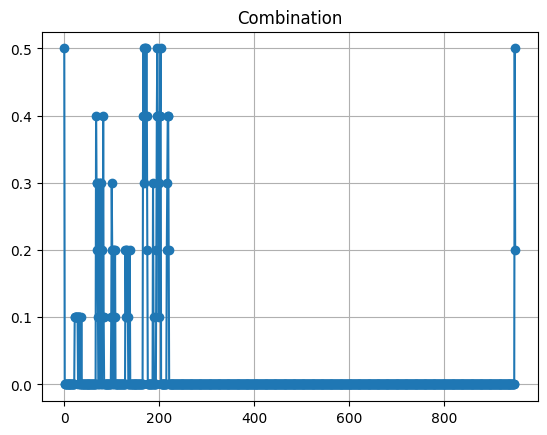

HEREEEE
HERRR2
[0.1, 0.1, 0.1, 0.1, 0.1, 0.0, 0.1, 0.1, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.3, 0.3, 0.2, 0.1, 0.0, 0.0, 0.3, 0.2, 0.3, 0.3, 0.0, 0.0, 0.2, 0.1, 0.4, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.3, 0.2, 0.0, 0.2, 0.0, 0.2, 0.1, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.1, 0.2, 0.1, 0.2, 0.1, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.5, 0.4, 0.3, 0.4, 0.5, 0.4, 0.5, 0.4, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.4, 0.5, 0.4, 0.4, 0.1, 0.3, 0.4, 0.4, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.3, 0.4, 0.4, 0.2,

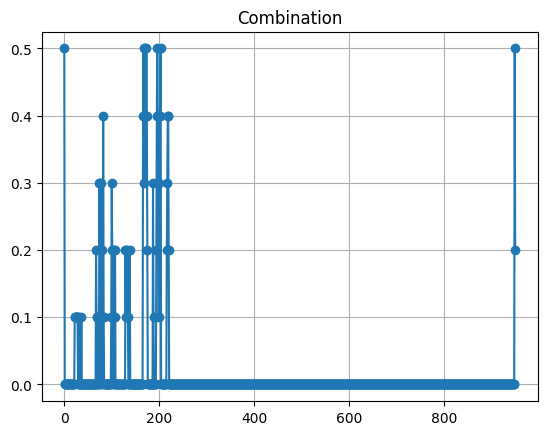

HEREEEE
HERRR2
[0.1, 0.1, 0.1, 0.1, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.3, 0.2, 0.3, 0.3, 0.0, 0.0, 0.2, 0.1, 0.4, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.3, 0.2, 0.0, 0.2, 0.0, 0.2, 0.1, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.1, 0.2, 0.1, 0.2, 0.1, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.5, 0.4, 0.3, 0.4, 0.5, 0.4, 0.5, 0.4, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.4, 0.5, 0.4, 0.4, 0.1, 0.3, 0.4, 0.4, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.3, 0.4, 0.4, 0.2, 0.0,

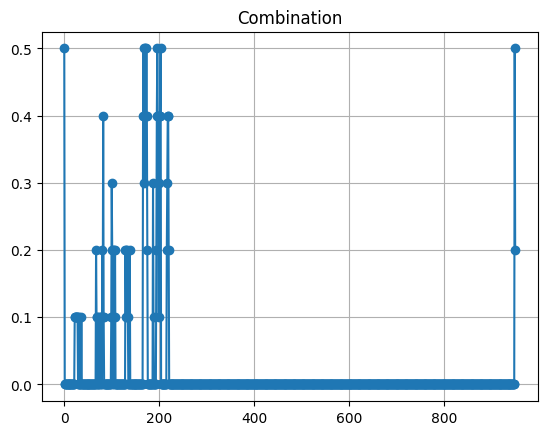

HEREEEE
HERRR2
[0.1, 0.1, 0.1, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.1, 0.1, 0.0, 0.0, 0.2, 0.1, 0.4, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.3, 0.2, 0.0, 0.2, 0.0, 0.2, 0.1, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.1, 0.2, 0.1, 0.2, 0.1, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.5, 0.4, 0.3, 0.4, 0.5, 0.4, 0.5, 0.4, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.4, 0.5, 0.4, 0.4, 0.1, 0.3, 0.4, 0.4, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.3, 0.4, 0.4, 0.2, 0.0, 0.0,

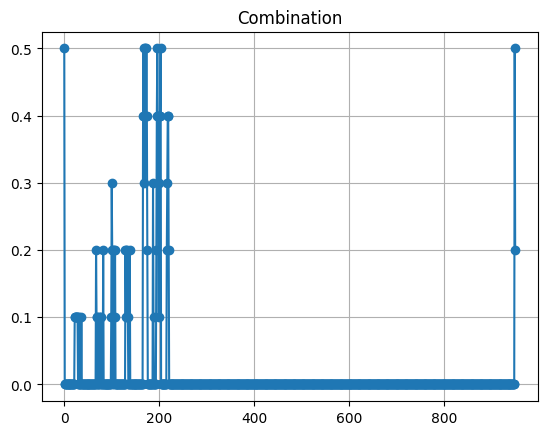

HEREEEE
HERRR2
[0.1, 0.1, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.3, 0.2, 0.0, 0.2, 0.0, 0.2, 0.1, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.1, 0.2, 0.1, 0.2, 0.1, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.5, 0.4, 0.3, 0.4, 0.5, 0.4, 0.5, 0.4, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.4, 0.5, 0.4, 0.4, 0.1, 0.3, 0.4, 0.4, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.3, 0.4, 0.4, 0.2, 0.0, 0.0, 0.0,

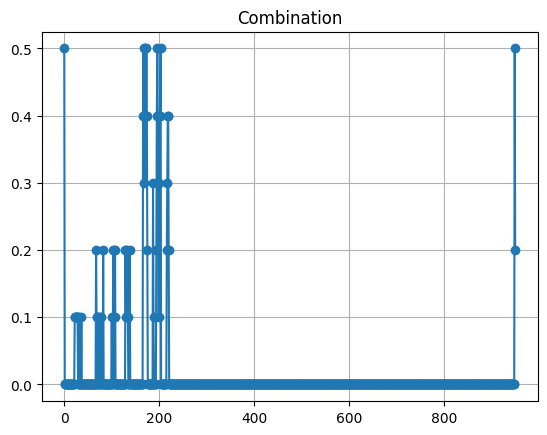

HEREEEE
HERRR2
[0.1, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.2, 0.0, 0.2, 0.1, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.1, 0.2, 0.1, 0.2, 0.1, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.5, 0.4, 0.3, 0.4, 0.5, 0.4, 0.5, 0.4, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.4, 0.5, 0.4, 0.4, 0.1, 0.3, 0.4, 0.4, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.3, 0.4, 0.4, 0.2, 0.0, 0.0, 0.0, 0.0,

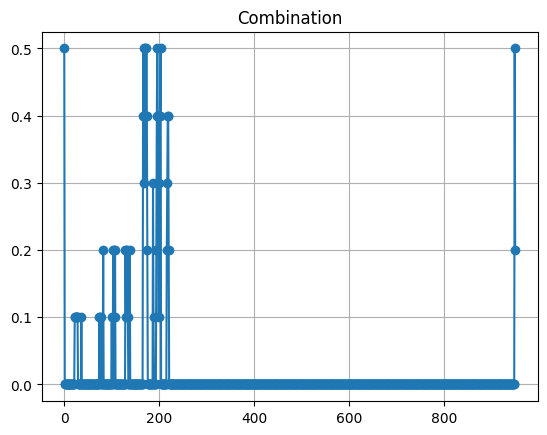

HEREEEE
HERRR2
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.2, 0.0, 0.2, 0.1, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.1, 0.2, 0.1, 0.2, 0.1, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.5, 0.4, 0.3, 0.4, 0.5, 0.4, 0.5, 0.4, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.4, 0.5, 0.4, 0.4, 0.1, 0.3, 0.4, 0.4, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.3, 0.4, 0.4, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0,

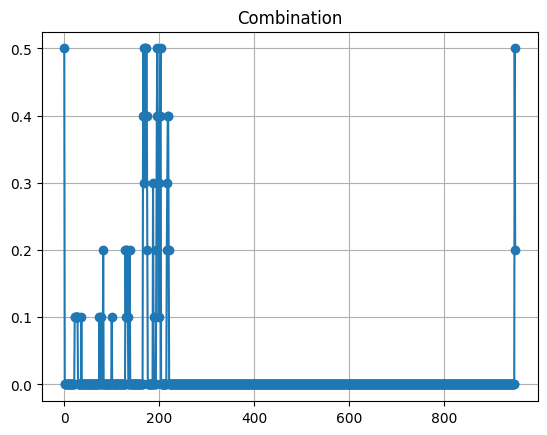

HEREEEE
HERRR2
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.1, 0.2, 0.1, 0.2, 0.1, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.5, 0.4, 0.3, 0.4, 0.5, 0.4, 0.5, 0.4, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.4, 0.5, 0.4, 0.4, 0.1, 0.3, 0.4, 0.4, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.3, 0.4, 0.4, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

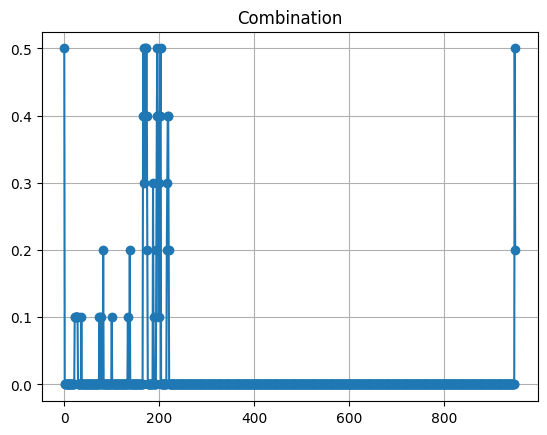

HEREEEE
HERRR2
[0.0, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.5, 0.4, 0.3, 0.4, 0.5, 0.4, 0.5, 0.4, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.4, 0.5, 0.4, 0.4, 0.1, 0.3, 0.4, 0.4, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.3, 0.4, 0.4, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

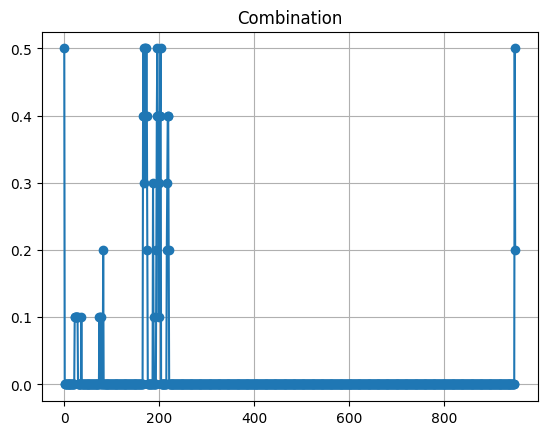

HEREEEE
HERRR2
[0.1, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.5, 0.4, 0.3, 0.4, 0.5, 0.4, 0.5, 0.4, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.4, 0.5, 0.4, 0.4, 0.1, 0.3, 0.4, 0.4, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.3, 0.4, 0.4, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

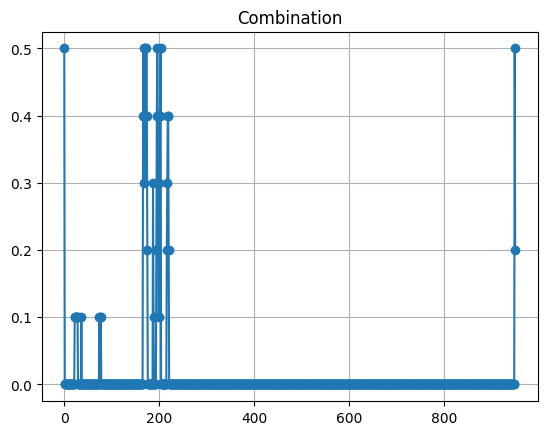

HEREEEE
HERRR2
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.5, 0.4, 0.3, 0.4, 0.5, 0.4, 0.5, 0.4, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.4, 0.5, 0.4, 0.4, 0.1, 0.3, 0.4, 0.4, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.3, 0.4, 0.4, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

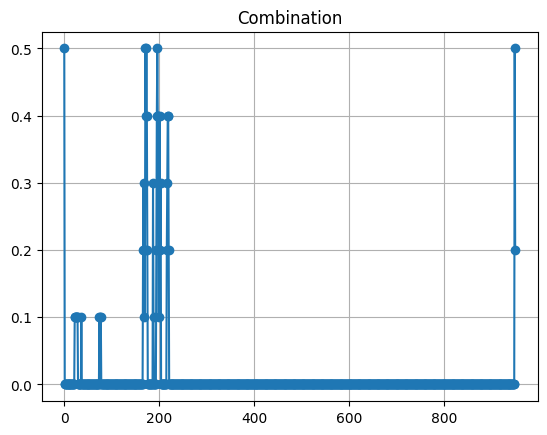

HEREEEE
HERRR2
[0.3, 0.2, 0.1, 0.2, 0.5, 0.4, 0.5, 0.4, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.4, 0.5, 0.4, 0.4, 0.1, 0.3, 0.4, 0.2, 0.3, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.3, 0.4, 0.4, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

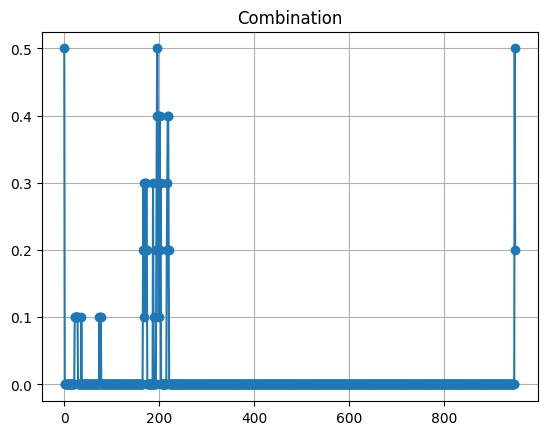

HEREEEE
HERRR2
[0.2, 0.1, 0.2, 0.3, 0.2, 0.3, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.4, 0.5, 0.4, 0.4, 0.1, 0.3, 0.4, 0.2, 0.3, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.3, 0.4, 0.4, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

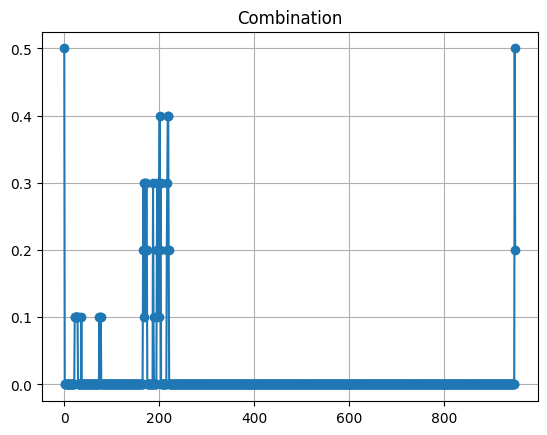

HEREEEE
HERRR2
[0.1, 0.2, 0.3, 0.2, 0.3, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.3, 0.2, 0.2, 0.1, 0.3, 0.4, 0.2, 0.3, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.3, 0.4, 0.4, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

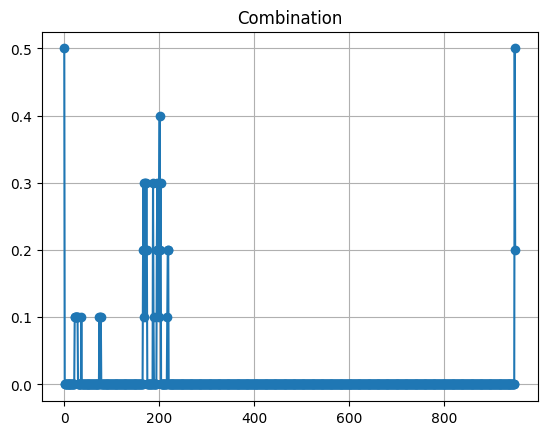

HEREEEE
HERRR2
[0.2, 0.3, 0.2, 0.3, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.3, 0.2, 0.2, 0.1, 0.3, 0.4, 0.2, 0.3, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.2, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

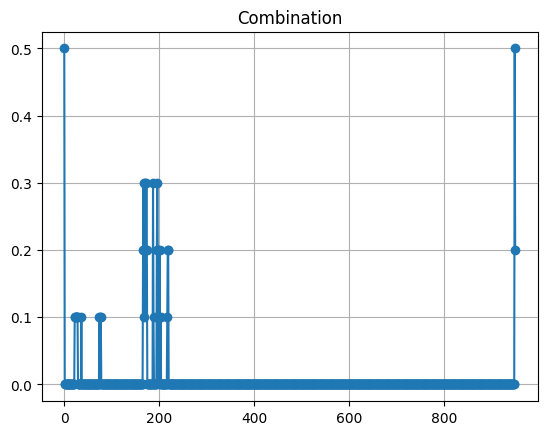

HEREEEE
HERRR2
[0.3, 0.2, 0.3, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.3, 0.2, 0.2, 0.0, 0.1, 0.2, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.2, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

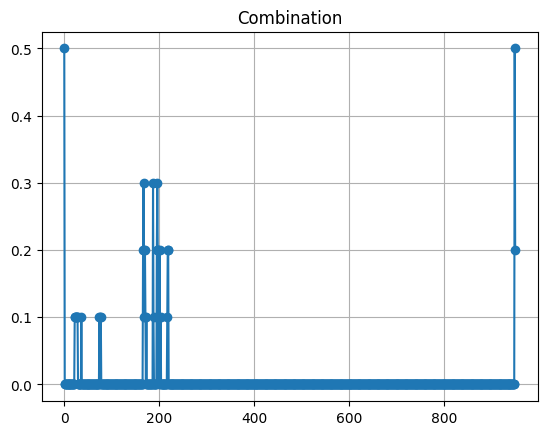

HEREEEE
HERRR2
[0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.3, 0.2, 0.2, 0.0, 0.1, 0.2, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.2, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

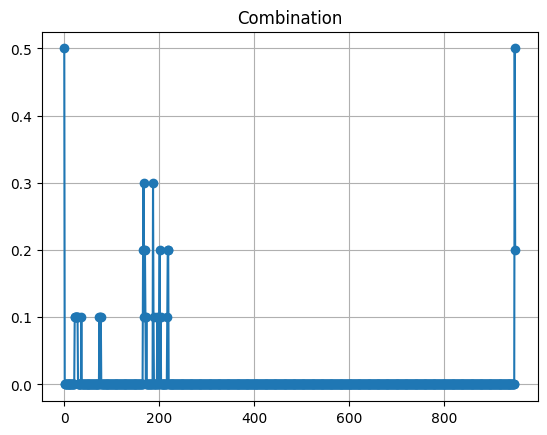

HEREEEE
HERRR2
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.1, 0.2, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.2, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

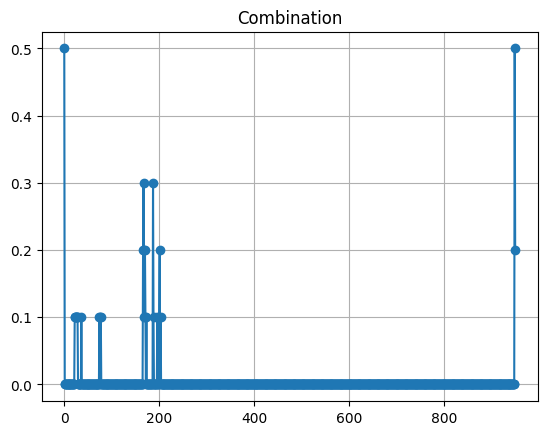

HEREEEE
HERRR2
[0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.1, 0.2, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

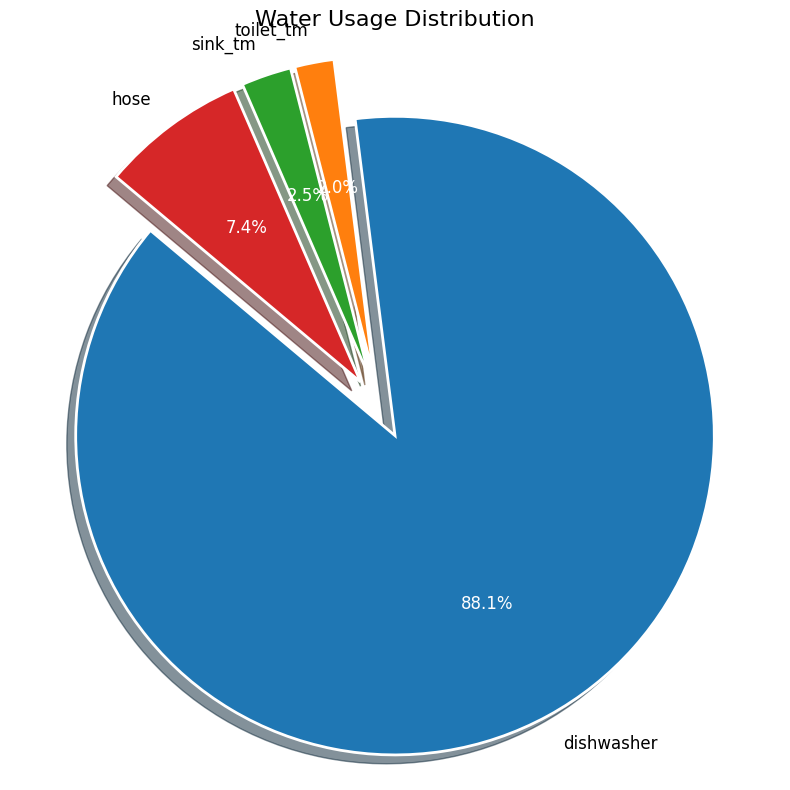

In [ ]:
# for FIXED large appliances
gallon_token = {'dishwasher':0,
                'toilet_tm':0,
                'toilet_km':0,
                'sink_tm':0,
                'shower_tm':0,
                'shower_km':0,
                'hose':0,
                'laundry':0}

def first_derivative(signature):
    return np.diff(signature, prepend=signature[0])

def pad_signature(signature, desired_length):
    repeat_factor = (desired_length // len(signature)) + 1
    padded_signature = np.tile(signature, repeat_factor)[:desired_length]
    return padded_signature

def remove__signature(remove_signature, combined_signature):
    if len(remove_signature) > len(combined_signature):
        # The combined signature is smaller than the correlation signature
        best_corr_value = float('-inf')
        best_match_index = 0
        best_matched_segment = np.zeros_like(combined_signature)

        # Slide a window over the remove_signature to match the length of the combined_signature
        for i in range(len(remove_signature) - len(combined_signature) + 1):
            window = remove_signature[i:i + len(combined_signature)]

            # Compute cross-correlation for the window
            corr = correlate(combined_signature, window, mode='valid')

            # Find the index of the maximum correlation within this window
            max_corr_value = np.max(corr)

            if max_corr_value > best_corr_value:
                best_corr_value = max_corr_value
                best_match_index = i
                best_matched_segment = window

        # Subtract the best matched segment from the combined signature
        result_signature = combined_signature.copy()
        result_signature -= best_matched_segment

        # Ensure that no values in the result signature are less than 0
        result_signature = np.maximum(result_signature, 0)

        # Calculate usage removed
        removed_usage = np.sum(best_matched_segment)

        return result_signature, removed_usage
    else:
      # Compute cross-correlation
      corr = correlate(combined_signature, remove_signature, mode='valid')

      # Find the index of the maximum correlation
      max_index = np.argmax(corr)

      # Extract the segment of the combined signature that matches the shower signature
      matched_segment = combined_signature[max_index:max_index + len(remove_signature)]

      # Subtract the shower signature from the combined signature
      result_signature = combined_signature.copy()
      result_signature[max_index:max_index + len(remove_signature)] -= remove_signature

      result_signature = np.maximum(result_signature, 0)

      # Calculate water usage removed
      removed_usage = np.sum(remove_signature)

      return result_signature, removed_usage

# Compute DTW distances and paths for fixed and variable length signatures
def compute_dtw_distances_and_paths(new_signature, known_signatures):
    results = []
    paths = []

    if len(new_signature) >= 3:
      new_signature = first_derivative(new_signature)

    for idx, known_signature in enumerate(known_signatures):

        if len(new_signature) >= 3:
          known_signature = first_derivative(known_signature)

        if len(new_signature) > len(known_signature):
            known_signature_extend = pad_signature(known_signature, len(new_signature))
            min_distance, best_path = dtw.warping_paths(new_signature, known_signature_extend)
            # plot_signatures(new_signature, known_signature_extend, idx)

        elif len(new_signature) < len(known_signature):
            new_signature_extend = pad_signature(new_signature, len(known_signature))
            min_distance, best_path = dtw.warping_paths(new_signature_extend, known_signature)
            # plot_signatures(new_signature_extend, known_signature, idx)

        else:
            min_distance, best_path = dtw.warping_paths(new_signature, known_signature)
            #plot_signatures(new_signature, known_signature, idx)

        results.append({
              'index': idx,
              'dtw_distance': min_distance,
        })

        paths.append(best_path)
    return results, paths

# Find the most similar signature
def find_most_similar(results):
    return min(results, key=lambda x: x['dtw_distance'])

# FIXED APPLIANCES
fixed_lengths = dict(sorted(fixed_lengths.items(), key=lambda item: item[1], reverse=True))
new_signature = new_array
known_signatures = list(water_signatures.values())

plt.plot(new_signature, marker='o')
plt.title('Combination')
plt.grid(True)
plt.show()

print(new_signature)

for appliance, length in fixed_lengths.items():
  print(appliance)

  if len(new_signature) < length:
    c = 1
  else:
    c = len(new_signature) - length + 1

  for i in range(c):
    print("HEREEEE")

    sublist = new_signature[i:i + length]
    print("HERRR2")

    print(sublist)

    if sublist[0] == 0:
      continue
    else:
      # Compute DTW distances and paths for fixed and variable length signatures
      distances, paths = compute_dtw_distances_and_paths(sublist, known_signatures)

      # Find the most similar signature based on DTW distance
      most_similar = find_most_similar(distances)

      if list(gallon_token.keys())[most_similar['index']] == appliance:
        sublist, gallons_to_appliance = remove__signature(np.array(known_signatures[most_similar['index']]), np.array(sublist))
        sublist = np.round(sublist, 3)
        new_signature[i:i + length] = sublist

        gallon_token[list(water_signatures.keys())[most_similar['index']]] += gallons_to_appliance

        print(gallon_token)

        plt.plot(new_signature, marker='o')
        plt.title('Combination')
        plt.grid(True)
        plt.show()


# OTHER

new_signatures = split_list_by_zeros(new_signature)
print(new_signatures)

for new_signature in new_signatures:

  while np.sum(new_signature) != 0:

    # Compute DTW distances and paths for fixed and variable length signatures
    distances, paths = compute_dtw_distances_and_paths(new_signature, known_signatures)

    # Find the most similar signature based on DTW distance
    most_similar = find_most_similar(distances)

    print(most_similar)

    new_signature, gallons_to_appliance = remove__signature(np.array(known_signatures[most_similar['index']]), np.array(new_signature))
    new_signature = np.round(new_signature, 3)

    # Find the indices where the array is non-zero
    non_zero_indices = np.nonzero(new_signature)[0]

    # Slice the array from the first non-zero index to the last non-zero index
    if non_zero_indices.size > 0:
      new_signature = new_signature[non_zero_indices[0]:non_zero_indices[-1] + 1]

    gallon_token[list(water_signatures.keys())[most_similar['index']]] += gallons_to_appliance

print(gallon_token)
# Filter out zero values for the pie chart
labels = [key for key, value in gallon_token.items() if value > 0]
sizes = [value for value in gallon_token.values() if value > 0]

# Create a new figure
plt.figure(figsize=(8, 8))

# Define colors for the pie chart
colors = plt.cm.tab10.colors  # Use a colormap for better aesthetics

# Create pie chart with aesthetic options
if sizes:  # Ensure there are non-zero values to plot
    wedges, texts, autotexts = plt.pie(
        sizes,
        labels=labels,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors[:len(sizes)],  # Limit colors to the number of sizes
        shadow=True,
        explode=[0.1] * len(sizes)  # Slightly explode each slice
    )

    # Aesthetic adjustments
    for text in texts:
        text.set_fontsize(12)  # Label font size
    for autotext in autotexts:
        autotext.set_fontsize(12)  # Percentage font size
        autotext.set_color('white')  # Color of percentage text

    plt.setp(wedges, linewidth=2, edgecolor='white')  # Edge color and width

else:
    plt.pie([1], labels=['No Data'], startangle=140)  # Fallback for empty data

# Equal aspect ratio ensures that pie chart is drawn as a circle
plt.axis('equal')
plt.title('Water Usage Distribution', fontsize=16)  # Title of the pie chart
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()